In [1]:
from google.colab import drive # this mounts Google Drive to this notebook
drive.mount('/content/gdrive') # , force_remount=True

Mounted at /content/gdrive


In [2]:
%pip install earthpy #package for geospatial data manipulation that is a front end for GeoPandas among others

     |████████████████████████████████| 1.4MB 5.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 972kB 16.3MB/s 
     |████████████████████████████████| 18.3MB 242kB/s 
     |████████████████████████████████| 6.5MB 40.4MB/s 
     |████████████████████████████████| 14.8MB 268kB/s 
  Created wheel for earthpy: filename=earthpy-0.9.2-cp36-none-any.whl size=1365088 sha256=b9bd2d2f943353a38392b23c2631b75acc99f7644dbb7aa6b94c1fb06046ce26
  Stored in directory: /root/.cache/pip/wheels/27/f9/a5/026bb95ef7b12f9343b842da6897b4001c5b902550095cbbbe
Successfully built earthpy


In [4]:
import pandas as pd
import numpy as np
import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es
import rasterio as rio
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from rasterio.plot import plotting_extent
from osgeo import gdal
import geopandas as gpd
import os


In [14]:
%cd /content/gdrive/Shared drives/GEOL557_Group_Project/data/Shapefiles
%ls

/content/gdrive/Shared drives/GEOL557_Group_Project/data/Shapefiles
 Cabeus_Clipping.cpg
 Cabeus_Clipping.dbf
 Cabeus_Clipping.prj
 Cabeus_Clipping.sbn
 Cabeus_Clipping.sbx
 Cabeus_Clipping.shp
 Cabeus_Clipping.shp.xml
 Cabeus_Clipping.shx
 Crashed_Spacecraft_LCROSS_Centaur.cpg
 Crashed_Spacecraft_LCROSS_Centaur.dbf
 Crashed_Spacecraft_LCROSS_Centaur.prj
 Crashed_Spacecraft_LCROSS_Centaur.sbn
 Crashed_Spacecraft_LCROSS_Centaur.sbx
 Crashed_Spacecraft_LCROSS_Centaur.shp
 Crashed_Spacecraft_LCROSS_Centaur.shx
 Crashed_Spacecraft_LCROSS_Centuar_1_5_10_15.cpg
 Crashed_Spacecraft_LCROSS_Centuar_1_5_10_15.dbf
 Crashed_Spacecraft_LCROSS_Centuar_1_5_10_15.prj
 Crashed_Spacecraft_LCROSS_Centuar_1_5_10_15.sbn
 Crashed_Spacecraft_LCROSS_Centuar_1_5_10_15.sbx
 Crashed_Spacecraft_LCROSS_Centuar_1_5_10_15.shp
 Crashed_Spacecraft_LCROSS_Centuar_1_5_10_15.shp.xml
 Crashed_Spacecraft_LCROSS_Centuar_1_5_10_15.shx
 Crashed_Spacecraft_LCROSS.cpg
 Crashed_Spacecraft_LCROSS.dbf
 Crashed_Spacecraft_LCROSS.pr

In [15]:
Cabeus_Clipping=gpd.read_file('Cabeus_Clipping.shp')
Crashed_Spacecraft_LCROSS_Centaur=gpd.read_file('Crashed_Spacecraft_LCROSS_Centaur.shp')
Crashed_Spacecraft_LCROSS_Centuar_1_5_10_15=gpd.read_file('Crashed_Spacecraft_LCROSS_Centuar_1_5_10_15.shp')
Crashed_Spacecraft_LCROSS=gpd.read_file('Crashed_Spacecraft_LCROSS.shp')
PSRs_Cabeus_clp=gpd.read_file('PSRs_Cabeus_clp.shp')
SPole_Crater_Namesp=gpd.read_file('SPole_Crater_Names.shp')
Spole_DEM1000m_Contours_clp=gpd.read_file('Spole_DEM1000m_Contours_clp.shp')
USGS_LinearFeatures_Cabeus=gpd.read_file('USGS_LinearFeatures_Cabeus.shp')

In [17]:
%cd /content/gdrive/Shared drives/GEOL557_Group_Project/data
%ls

/content/gdrive/Shared drives/GEOL557_Group_Project/data
AVGVISIB_85S_060M_201608_clp20m.tfw          Shapefiles/
AVGVISIB_85S_060M_201608_clp20m.tif          spoledem10m_clp20m.tfw
AVGVIS_SUN60m.tif                            spoledem10m_clp20m.tif
polar_south_80_summer_max_sp240m_clp40m.tfw  zold_data/
polar_south_80_summer_max_sp240m_clp40m.tif


In [18]:
with rio.open('AVGVIS_SUN60m.tif') as avgvis: #open the geotif file with RasterIO
      avgvis_np= avgvis.read(1)
      avgvis_plot_extent = plotting_extent(avgvis)

In [19]:
avgvis #numpy array 
df_avgvis = pd.DataFrame(data=avgvis_np) #Numpy array to Pandas dataframe
df_avgvis.iloc[0:5, 0:10] #look at a corner of the data array

,0,1,2,3,4,5,6,7,8,9
0,32767,32767,6154,6178,6134,6015,5886,5733,5585,5447
1,32767,32767,6470,6449,6397,6311,6198,6023,5882,5754
2,32767,32767,6663,6645,6606,6546,6409,5730,5763,6020
3,32767,32767,6804,6798,6771,6730,6671,6512,5621,5687
4,32767,32767,6902,6897,6880,6861,6825,6761,6556,6435


In [20]:
hillshade = es.hillshade(df_avgvis, azimuth=-30, altitude=30)

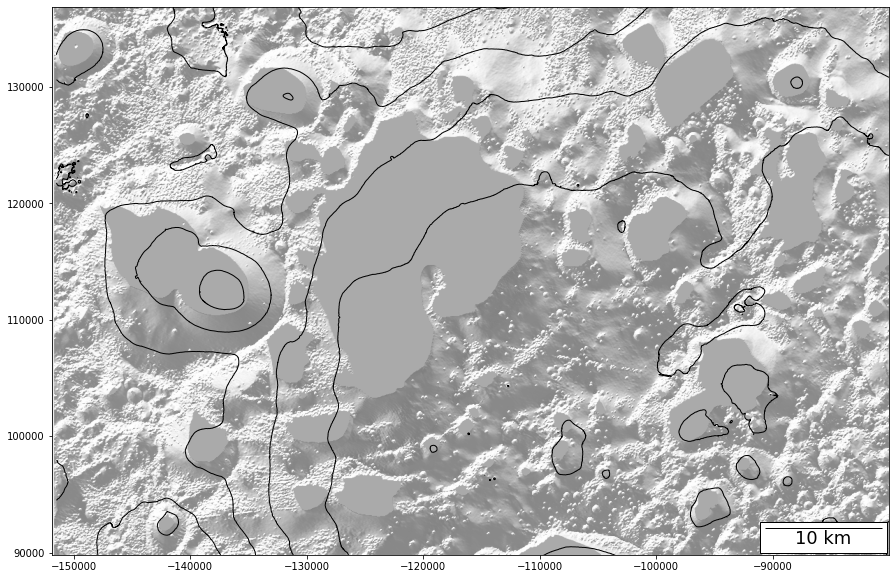

In [30]:
#Contour code and scale bar. Overlay of shapefiles
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar #need those for scalebar
import matplotlib.font_manager as fm
fontprops = fm.FontProperties(size=18)

fig, ax = plt.subplots(figsize=(15, 15))
Spole_DEM1000m_Contours_clp.plot(ax=ax,color='k', linewidth=1) #the boundary method only plots the outlines with no fill
ax.set_aspect('equal')

ax.imshow(hillshade, cmap="Greys", alpha=0.5, extent=avgvis_plot_extent)

scalebar = AnchoredSizeBar(ax.transData,
                           10000, '10 km', 'lower right', 
                           pad=0.3,
                           color='k',
                           frameon=True,
                           size_vertical=5,
                           fontproperties=fontprops)

ax.add_artist(scalebar)

plt.show()